In [4]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd
import seaborn as sns

In [5]:
data = pd.read_csv('pred_result/ambig/NS_BH_train.csv')
rows = []
display(data)
for t in data:
    rows.append(t)
rows =rows[16:]
print(rows)

,Unnamed: 0,Unnamed: 0.1,obs_id,index,is_ok,class,th_class,pred_code,pred_class,prob,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
0,0,2,2,2,1,BH,BH,1,BH,0.990246,...,13.083178,13.013990,4.3130,2.7990,17.89,8.830,0.6263,0.5576,0.8602,0.000
1,1,0,0,0,0,BH,X,2,NS,0.797091,...,0.000000,0.000000,0.0000,0.0000,0.00,0.000,0.0000,0.0000,0.0000,0.000
2,2,1,1,1,1,BH,BH,1,BH,0.970959,...,13.433798,13.353400,3.1340,2.0000,15.48,6.992,0.5002,0.4332,1.0350,0.000
3,3,10,10,0,1,BH,BH,1,BH,0.970523,...,0.000000,0.000000,0.0000,0.0000,0.00,0.000,0.0000,0.0000,0.0000,0.000
4,4,11,11,1,1,BH,BH,1,BH,0.972695,...,13.196065,13.052468,3.5500,1.9820,168.60,113.200,0.8334,0.6885,89.6000,46.560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,365,435,631,14,1,NS,NS,1,NS,1.000000,...,12.565910,12.474437,0.7382,0.5778,57.98,47.660,0.3158,0.2750,38.0100,27.170
366,366,422,618,1,1,NS,NS,1,NS,0.999752,...,12.177963,12.135845,1.7890,1.4190,35.84,27.420,0.4899,0.4420,11.1200,2.627
367,367,441,637,0,1,NS,NS,1,NS,0.999999,...,11.891435,11.875170,1.5250,1.4110,88.92,83.260,0.5262,0.5079,49.7400,44.930
368,368,443,639,1,1,NS,NS,1,NS,0.997641,...,0.000000,0.000000,0.0000,0.0000,0.00,0.000,0.0000,0.0000,0.0000,0.000


['var_inter_sigma', 'var_inter_prob', 'var_inter_index', 'var_max', 'var_min', 'var_mean', 'var_sigma', 'kp_prob', 'ks_prob', 'var_prob', 'var_index', 'flux_aper_hilim', 'flux_aper_lolim', 'flux_aper', 'photflux_aper_hilim', 'photflux_aper_lolim', 'photflux_aper', 'flux_significance', 'photflux_aper_b', 'photflux_aper_h', 'photflux_aper_m', 'photflux_aper_u', 'photflux_aper_s', 'photflux_aper_lolim_b', 'photflux_aper_lolim_h', 'photflux_aper_lolim_m', 'photflux_aper_lolim_u', 'photflux_aper_lolim_s', 'photflux_aper_hilim_b', 'photflux_aper_hilim_h', 'photflux_aper_hilim_m', 'photflux_aper_hilim_u', 'photflux_aper_hilim_s', 'flux_aper_b', 'flux_aper_h', 'flux_aper_m', 'flux_aper_u', 'flux_aper_s', 'flux_aper_lolim_b', 'flux_aper_lolim_h', 'flux_aper_lolim_m', 'flux_aper_lolim_u', 'flux_aper_lolim_s', 'flux_aper_hilim_b', 'flux_aper_hilim_h', 'flux_aper_hilim_m', 'flux_aper_hilim_u', 'flux_aper_hilim_s', 'hard_hm', 'hard_hs', 'hard_ms', 'flux_powlaw', 'powlaw_gamma', 'powlaw_nh', 'powlaw

In [6]:
ns = data[data['th_class']=='NS']
bh = data[data['th_class']=='BH']
x = data[data['th_class']=='X']

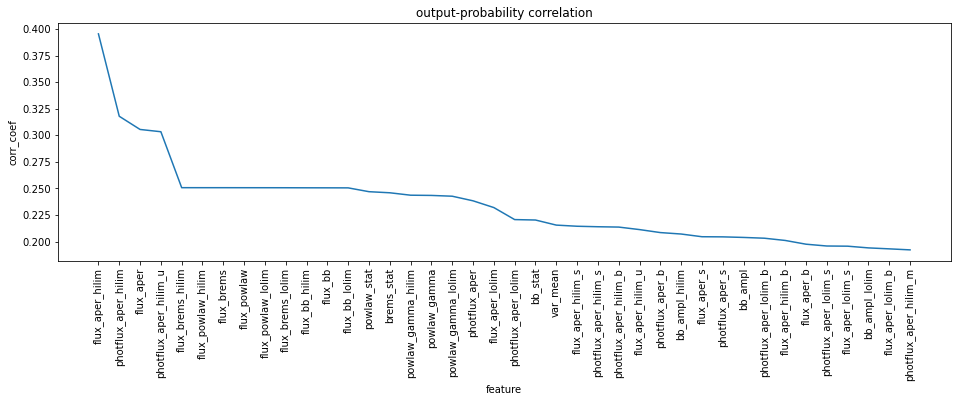

In [10]:
param_corr = []
param_imp = pd.DataFrame()
param_imp.insert(0 , 'feat_name' , rows)
for p in rows:
    feat_val = ns[p].to_numpy()
    corr = abs(np.corrcoef(feat_val , ns['prob'])[0,1])
    param_corr.append(corr)
param_imp.insert(1,'corr_coef' ,param_corr)
param_imp = param_imp.sort_values(by = 'corr_coef' , ascending=False)
#display(param_imp)
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(16,10))
sns.lineplot(
    data = param_imp[:40] , 
    x='feat_name' , y = 'corr_coef',
    )
plt.xticks(rotation=90)
plt.title('output-probability correlation')
plt.xlabel('feature')

# alternate option without .gcf
plt.subplots_adjust(bottom=0.55)
plt.savefig('pred_result/plots/output-prob-corr_ns.jpg')
plt.show()

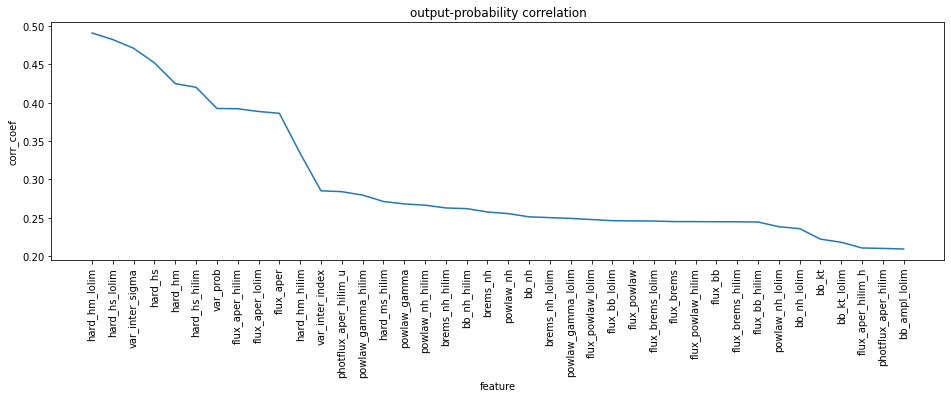

In [11]:
param_corr = []
param_imp = pd.DataFrame()
param_imp.insert(0 , 'feat_name' , rows)
for p in rows:
    feat_val = bh[p].to_numpy()
    corr = abs(np.corrcoef(feat_val , bh['prob'])[0,1])
    param_corr.append(corr)
param_imp.insert(1,'corr_coef' ,param_corr)
param_imp = param_imp.sort_values(by = 'corr_coef' , ascending=False)
#display(param_imp)
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(16,10))
sns.lineplot(
    data = param_imp[:40] , 
    x='feat_name' , y = 'corr_coef',
    )
plt.xticks(rotation=90)
plt.title('output-probability correlation')
plt.xlabel('feature')

# alternate option without .gcf
plt.subplots_adjust(bottom=0.55)
plt.savefig('pred_result/plots/output-prob-corr_bh.jpg')
plt.show()

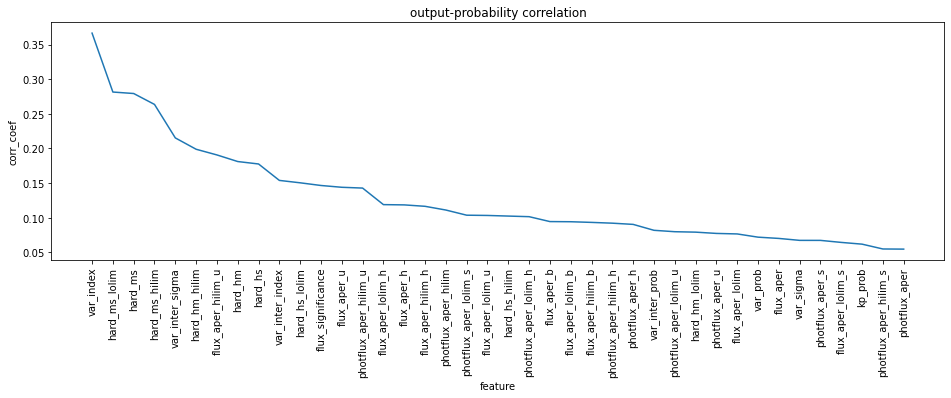

In [12]:
param_corr = []
param_imp = pd.DataFrame()
param_imp.insert(0 , 'feat_name' , rows)
for p in rows:
    feat_val = x[p].to_numpy()
    corr = abs(np.corrcoef(feat_val , x['prob'])[0,1])
    param_corr.append(corr)
param_imp.insert(1,'corr_coef' ,param_corr)
param_imp = param_imp.sort_values(by = 'corr_coef' , ascending=False)
#display(param_imp)
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(16,10))
sns.lineplot(
    data = param_imp[:40] , 
    x='feat_name' , y = 'corr_coef',
    )
plt.xticks(rotation=90)
plt.title('output-probability correlation')
plt.xlabel('feature')

# alternate option without .gcf
plt.subplots_adjust(bottom=0.55)
plt.savefig('pred_result/plots/output-prob-corr_ambig.jpg')
plt.show()